In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Введение
Датасет представляет собой сведения об успеваемости учеников в школе индийского города Assam
Необходимо на основании предложенных данных построить модель классификации, которая будет предсказывать значение столбца
**Performance**


In [2]:
cee = pd.read_csv('CEE_DATA.csv', header=0)
cee

,N,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER
664,664,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [3]:
cee.head()
cee.info()
cee.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   N                     666 non-null    int64 
 1   Performance           666 non-null    object
 2   Gender                666 non-null    object
 3   Caste                 666 non-null    object
 4   coaching              666 non-null    object
 5   time                  666 non-null    object
 6   Class_ten_education   666 non-null    object
 7   twelve_education      666 non-null    object
 8   medium                666 non-null    object
 9   Class_ X_Percentage   666 non-null    object
 10  Class_XII_Percentage  666 non-null    object
 11  Father_occupation     666 non-null    object
 12  Mother_occupation     666 non-null    object
dtypes: int64(1), object(12)
memory usage: 67.8+ KB


,N
count,666.000000
mean,332.500000
std,192.401923
min,0.000000
25%,166.250000
50%,332.500000
75%,498.750000
max,665.000000


In [4]:
def create_dummies(ds, column):
    dummies = pd.get_dummies(ds[column], prefix=column)
    ds = pd.concat([ds, dummies], 1)
    ds.drop(column, axis=1, inplace=True)
    return ds
def categorize(ds, column, categories):
    cat = pd.Categorical(ds[column], categories=categories)
    codes, unique = pd.factorize(cat)
    ds.drop(column, axis=1, inplace=True)
    ds[column] = codes
    return ds

### Подготовка модели
Все столбцы модели представляют собой строковый тип, поэтому придётся воспользоваться одним из 2 методов:
* Создание dummy-колонок
* Категоризация

Категоризуем следующие столбцы:
* Performance
* Class_ X_Percentage
* Class_XII_Percentage
* Coaching. Этот столбец обозначает прохождение учеником спецкурсов. Предполагаем, что студенты, прошедшие доп. курсы
имеют больше шансов на положительный результат

Столбы Father_occupation и Mother_occupation удалим, т.к. их не удастся категоризовать, а создание dummy-столбцов сильно
усложнит модель ввиду большого числа вариантов.

In [5]:
cee.drop('N', axis=1, inplace=True)

In [6]:
# cee = create_dummies(cee, 'Gender')
cee.drop('Gender', axis=1, inplace=True)


In [7]:
cee = create_dummies(cee, 'Caste')
# cee.drop('Caste', axis=1, inplace=True)

In [8]:
cee = categorize(cee, 'coaching', ['NO', 'WA', 'OA'])
# cee.drop('coaching', axis=1, inplace=True)

In [9]:
cee.Mother_occupation.unique()

cee = categorize(cee, 'Mother_occupation', cee['Mother_occupation'].unique())
# cee.drop('Mother_occupation', axis=1, inplace=True)

In [10]:
print(cee['Father_occupation'].unique())
cee = categorize(cee, 'Father_occupation', cee['Father_occupation'].unique())
# cee.drop('Father_occupation', axis=1, inplace=True)

['DOCTOR' 'SCHOOL_TEACHER' 'BUSINESS' 'COLLEGE_TEACHER' 'OTHERS'
 'BANK_OFFICIAL' 'ENGINEER' 'CULTIVATOR']


In [11]:
# cee = create_dummies(cee, 'time')
# print(cee.time.unique())
cee = categorize(cee, 'time', ['ONE', 'TWO','THREE','FOUR','FIVE', 'SIX', 'SEVEN'])
# sns.histplot(data=cee, x='time', hue='Performance', stat='count', multiple='dodge')
# cee.drop('time', axis=1, inplace=True)

In [12]:
cee = create_dummies(cee, 'Class_ten_education')
# cee.drop('Class_ten_education', axis=1, inplace=True)


In [13]:
cee = create_dummies(cee, 'twelve_education')
# cee.drop('twelve_education', axis=1, inplace=True)


In [14]:
# cee = create_dummies(cee, 'medium')
cee = categorize(cee, 'medium', ['OTHERS', 'ASSEMESE','ENGLISH'])

In [15]:
cee['Class_ X_Percentage'].unique()

array(['Excellent', 'Vg', 'Good', 'Average'], dtype=object)

In [16]:
percentages = ['Average', 'Good', 'Vg', 'Excellent']
cee = categorize(cee, 'Class_ X_Percentage', percentages)

In [17]:
cee['Class_XII_Percentage'].unique()

array(['Excellent', 'Vg', 'Good', 'Average'], dtype=object)

In [18]:
cee = categorize(cee, 'Class_XII_Percentage', percentages)

In [19]:
cee = categorize(cee, 'Performance', percentages)

In [20]:
cee.info()
cee.describe()
cee


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Caste_General               666 non-null    uint8
 1   Caste_OBC                   666 non-null    uint8
 2   Caste_SC                    666 non-null    uint8
 3   Caste_ST                    666 non-null    uint8
 4   coaching                    666 non-null    int64
 5   Mother_occupation           666 non-null    int64
 6   Father_occupation           666 non-null    int64
 7   time                        666 non-null    int64
 8   Class_ten_education_CBSE    666 non-null    uint8
 9   Class_ten_education_OTHERS  666 non-null    uint8
 10  Class_ten_education_SEBA    666 non-null    uint8
 11  twelve_education_AHSEC      666 non-null    uint8
 12  twelve_education_CBSE       666 non-null    uint8
 13  twelve_education_OTHERS     666 non-null    uint8
 14  medium    

,Caste_General,Caste_OBC,Caste_SC,Caste_ST,coaching,Mother_occupation,Father_occupation,time,Class_ten_education_CBSE,Class_ten_education_OTHERS,Class_ten_education_SEBA,twelve_education_AHSEC,twelve_education_CBSE,twelve_education_OTHERS,medium,Class_ X_Percentage,Class_XII_Percentage,Performance
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0
2,0,1,0,0,2,1,2,1,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,1,2,1,0,0,0,1,1,0,0,1,0,0,0
4,1,0,0,0,2,1,3,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0,0,0,1,1,1,4,0,0,0,1,1,0,0,0,2,1,3
662,0,0,0,1,1,1,7,2,0,0,1,1,0,0,0,1,2,3
663,0,0,0,1,1,2,4,1,0,0,1,0,1,0,0,2,1,3
664,0,0,0,1,1,1,1,2,0,0,1,1,0,0,0,2,2,3


In [21]:
# sns.countplot(data=cee, x='medium_ASSAMESE', hue='Performance')

In [22]:
# sns.countplot(data=cee, x='medium_ENGLISH', hue='Performance')

In [23]:
# sns.countplot(data=cee, x='medium_OTHERS', hue='Performance')

<AxesSubplot:xlabel='twelve_education_AHSEC', ylabel='count'>

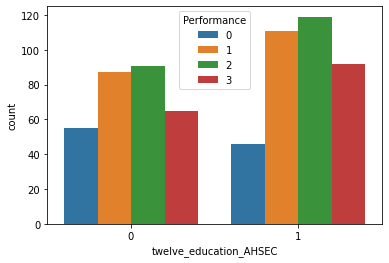

In [24]:
sns.countplot(data=cee, x='twelve_education_AHSEC', hue='Performance')

<AxesSubplot:xlabel='twelve_education_CBSE', ylabel='count'>

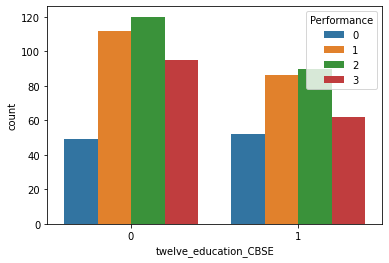

In [25]:
sns.countplot(data=cee, x='twelve_education_CBSE', hue='Performance')

<AxesSubplot:xlabel='twelve_education_OTHERS', ylabel='count'>

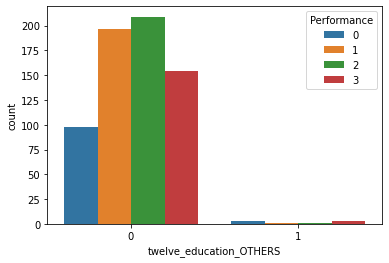

In [26]:
sns.countplot(data=cee, x='twelve_education_OTHERS', hue='Performance')
# cee.drop('twelve_education_OTHERS', axis=1, inplace=True)

<AxesSubplot:xlabel='Class_ X_Percentage', ylabel='count'>

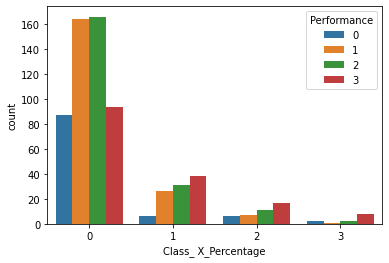

In [27]:
sns.countplot(data=cee, x='Class_ X_Percentage', hue='Performance')

<AxesSubplot:xlabel='Class_XII_Percentage', ylabel='count'>

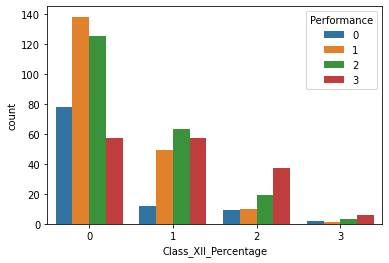

In [28]:
sns.countplot(data=cee, x='Class_XII_Percentage', hue='Performance')

<AxesSubplot:>

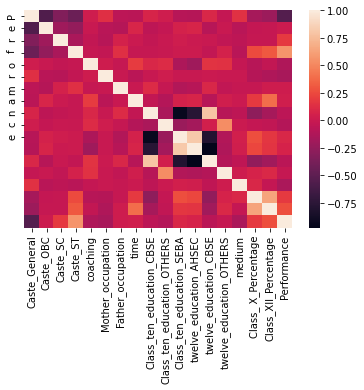

In [29]:
corr = cee.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns[-1])

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
y = cee.Performance
cee.drop('Performance', axis=1, inplace=True)
x = cee
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [32]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
classifier.score(x_test, y_test)

0.5671641791044776

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(classifier, x, y)

array([0.3358209 , 0.39849624, 0.54135338, 0.47368421, 0.63157895])

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'dt__max_depth': range(1,10),
          'dt__criterion': ['entropy', 'gini'],
          'dt__min_samples_leaf': [i*2 for i in range(1, 8)],
          'dt__min_samples_split': [i*2 for i in range(1, 8)],
          }

In [38]:
params

{'dt__max_depth': range(1, 10),
 'dt__criterion': ['entropy', 'gini'],
 'dt__min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
 'dt__min_samples_split': [2, 4, 6, 8, 10, 12, 14]}

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [41]:
pipe = Pipeline([('sc',MinMaxScaler()), ('dt', classifier)])

In [42]:
gs = GridSearchCV(pipe, params, cv=6)

In [43]:
gs.fit(x, y)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('sc', MinMaxScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(max_depth=3))]),
             param_grid={'dt__criterion': ['entropy', 'gini'],
                         'dt__max_depth': range(1, 10),
                         'dt__min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'dt__min_samples_split': [2, 4, 6, 8, 10, 12, 14]})

In [44]:
gs.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 2,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 2}

In [45]:
gs.score(x, y)


0.496996996996997

### Вывод
Лучший результат модели около 0.60, что является достаточно посредственным результатом.
На результате сказалось малое количесво данных и их абстрактность.